#### This is for practice in PCA using dataset from men's decathlon in the 1988 Olympics

In [5]:
# Load dataset
file_path = 'C:/Users/minjk/OneDrive/Desktop/Study Books/SAS/DATASETS/DATASETS/OLYMPIC.DAT'
with open(file_path,'r') as file:
    content = file.read() 
print(content)

11.25	7.43	15.48	2.27	48.90	15.13	49.28	4.7	61.32	268.95	8488
10.87	7.45	14.97	1.97	47.71	14.46	44.36	5.1	61.76	273.02	8399
11.18	7.44	14.20	1.97	48.29	14.81	43.66	5.2	64.16	263.20	8328
10.62	7.38	15.02	2.03	49.06	14.72	44.80	4.9	64.04	285.11	8306
11.02	7.43	12.92	1.97	47.44	14.40	41.20	5.2	57.46	256.64	8286
10.83	7.72	13.58	2.12	48.34	14.18	43.06	4.9	52.18	274.07	8272
11.18	7.05	14.12	2.06	49.34	14.39	41.68	5.7	61.60	291.20	8216
11.05	6.95	15.34	2.00	48.21	14.36	41.32	4.8	63.00	265.86	8189
11.15	7.12	14.52	2.03	49.15	14.66	42.36	4.9	66.46	269.62	8180
11.23	7.28	15.25	1.97	48.60	14.76	48.02	5.2	59.48	292.24	8167
10.94	7.45	15.34	1.97	49.94	14.25	41.86	4.8	66.64	295.89	8143
11.18	7.34	14.48	1.94	49.02	15.11	42.76	4.7	65.84	256.74	8114
11.02	7.29	12.92	2.06	48.23	14.94	39.54	5.0	56.80	257.85	8093
10.99	7.37	13.61	1.97	47.83	14.70	43.88	4.3	66.54	268.97	8083
11.03	7.45	14.20	1.97	48.94	15.44	41.66	4.7	64.00	267.48	8036
11.09	7.08	14.51	2.03	49.89	14.78	43.20	4.9	57.18	268.54	8021
11.46	6.

In [41]:
# Convert raw dataset into a data frame 
import pandas as pd

try:
    # Assuming data is in a structured format like CSV or similar
    df = pd.read_csv(file_path, delimiter='\t', header = None )
    # Process the DataFrame
    print(df)

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

       0     1      2     3      4      5      6    7      8       9     10
0   11.25  7.43  15.48  2.27  48.90  15.13  49.28  4.7  61.32  268.95  8488
1   10.87  7.45  14.97  1.97  47.71  14.46  44.36  5.1  61.76  273.02  8399
2   11.18  7.44  14.20  1.97  48.29  14.81  43.66  5.2  64.16  263.20  8328
3   10.62  7.38  15.02  2.03  49.06  14.72  44.80  4.9  64.04  285.11  8306
4   11.02  7.43  12.92  1.97  47.44  14.40  41.20  5.2  57.46  256.64  8286
5   10.83  7.72  13.58  2.12  48.34  14.18  43.06  4.9  52.18  274.07  8272
6   11.18  7.05  14.12  2.06  49.34  14.39  41.68  5.7  61.60  291.20  8216
7   11.05  6.95  15.34  2.00  48.21  14.36  41.32  4.8  63.00  265.86  8189
8   11.15  7.12  14.52  2.03  49.15  14.66  42.36  4.9  66.46  269.62  8180
9   11.23  7.28  15.25  1.97  48.60  14.76  48.02  5.2  59.48  292.24  8167
10  10.94  7.45  15.34  1.97  49.94  14.25  41.86  4.8  66.64  295.89  8143
11  11.18  7.34  14.48  1.94  49.02  15.11  42.76  4.7  65.84  256.74  8114
12  11.02  7

In [50]:
# assign column names 
df.columns = ['run100','Ljump','shot','Hjump' ,'run400', 'hurdle', 'discus', 'polevlt', 'javelin' ,'run1500' ,'score']
print(df)

    run100  Ljump   shot  Hjump  run400  hurdle  discus  polevlt  javelin  \
0    11.25   7.43  15.48   2.27   48.90   15.13   49.28      4.7    61.32   
1    10.87   7.45  14.97   1.97   47.71   14.46   44.36      5.1    61.76   
2    11.18   7.44  14.20   1.97   48.29   14.81   43.66      5.2    64.16   
3    10.62   7.38  15.02   2.03   49.06   14.72   44.80      4.9    64.04   
4    11.02   7.43  12.92   1.97   47.44   14.40   41.20      5.2    57.46   
5    10.83   7.72  13.58   2.12   48.34   14.18   43.06      4.9    52.18   
6    11.18   7.05  14.12   2.06   49.34   14.39   41.68      5.7    61.60   
7    11.05   6.95  15.34   2.00   48.21   14.36   41.32      4.8    63.00   
8    11.15   7.12  14.52   2.03   49.15   14.66   42.36      4.9    66.46   
9    11.23   7.28  15.25   1.97   48.60   14.76   48.02      5.2    59.48   
10   10.94   7.45  15.34   1.97   49.94   14.25   41.86      4.8    66.64   
11   11.18   7.34  14.48   1.94   49.02   15.11   42.76      4.7    65.84   

In [48]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

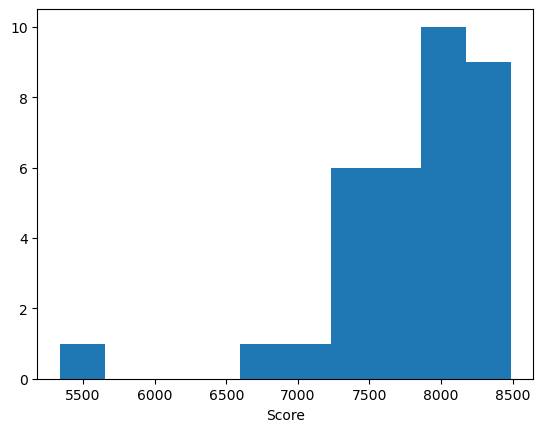

In [62]:
plt.hist(df.score)
plt.xlabel("Score") 
plt.show()

In [78]:
# Drop an athelete data (outlier) 
df = df.drop(33)

In [ ]:
# Distributing the dataset into two compornents X and y 
X = df.

In [182]:
X = df.iloc[0:, 0:10] 
y = df.iloc[:, 10:11]

In [186]:
# Splitting the datset into the training set and test set


from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [192]:
#Feature scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

C:\Users\minjk\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [194]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_varinace = pca.explained_variance_ratio_

PCA(n_components=2)